<a href="https://colab.research.google.com/github/VinnyPro/Inteligencia-de-negocios/blob/master/BI_04_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal múltiple

**Regresión lineal simple**

$$
\large
y=mx+b
$$

**Regresión lineal múltiple**

$$
\large
y=m_1x_1+m_2x_2+\dots+m_nx_n+\epsilon
$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url="https://raw.githubusercontent.com/edavgaun/Inteligencia-de-negocios/master/Datasets/Advertising.csv"

In [ ]:
df=pd.read_csv(url, index_col="Unnamed: 0")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

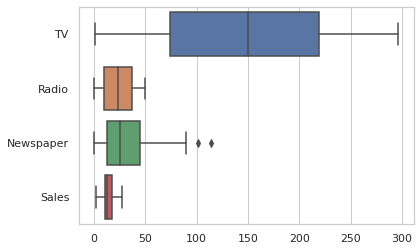

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, orient="h")
plt.show()

<img src="https://www.master-malaga.com/wp-content/uploads/2016/05/gauss02.jpg">

<img src="https://es.justexw.com/wp-content/uploads/sites/2/diagrama-de-caja-ejemplo-1.jpg">

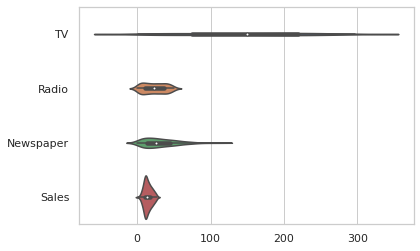

In [ ]:
sns.set_theme(style="whitegrid")
sns.violinplot(data=df, orient="h")
plt.show()

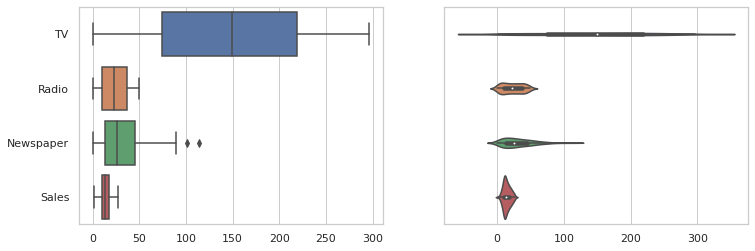

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4), sharey=True)
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, orient="h", ax=axs[0])
sns.violinplot(data=df, orient="h", ax=axs[1])
plt.show()

## Normalizar y Standarizar

**Normalizar**
$$
\large
x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}
$$

**Standarizar**
$$
\large
x_{std}=\frac{x-\bar{x}}{\sigma}
$$

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

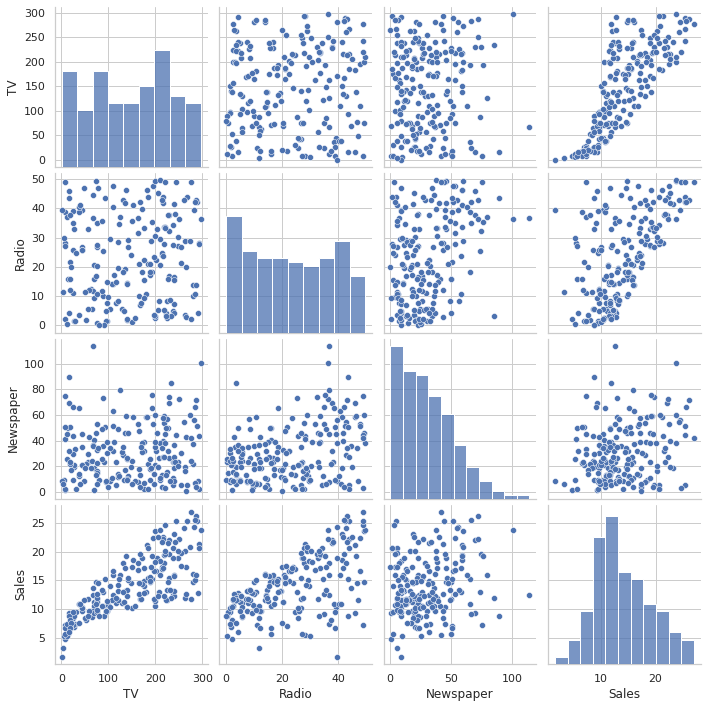

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
# El objeto scaler nos servirá para estandarizar las variables X
scaler = StandardScaler()
# Ajustando el objeto escalador a la media y distribución estandar
# de los datos de este ejercicio
scaler.fit(df)

# Transformamos los datos originales usando el objeto escalador
df2=scaler.transform(df)
df2=pd.DataFrame(df2)
df2.columns=df.columns

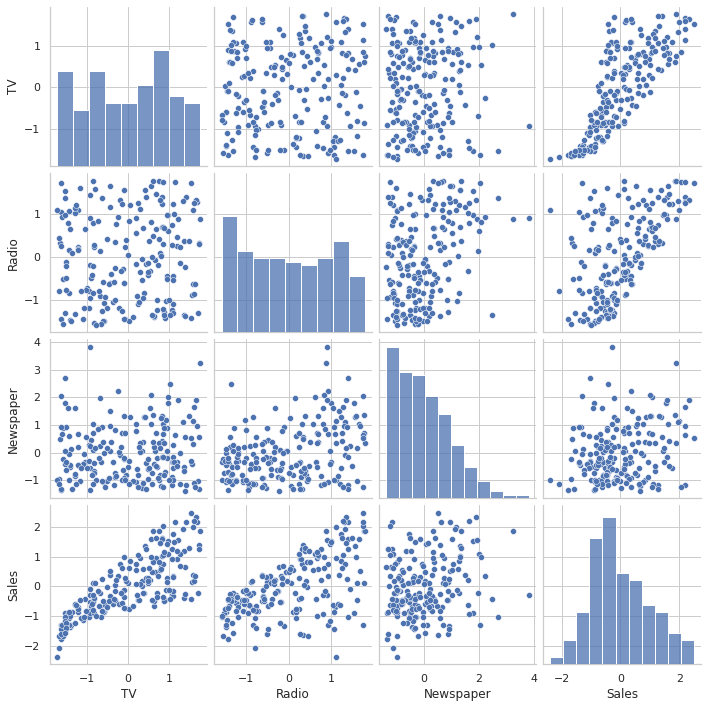

In [ ]:
sns.pairplot(data=df2)
plt.show()

## Generando la regresión

In [ ]:
# Verificando que no exista colinearidad entre mis variables descriptoras
df2.iloc[:,:-1].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


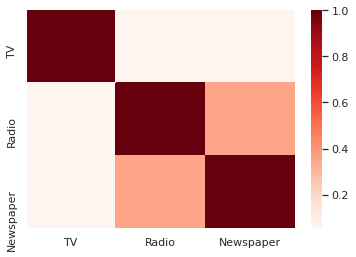

In [ ]:
sns.heatmap(df2.iloc[:,:-1].corr(), cmap="Reds")
plt.show()

In [ ]:
# NOTA: Para hacer uso de sklearn, hay que convertir a arreglos
from sklearn.linear_model import LinearRegression
# Si solamente se considera una columna se trata de regresión lineal simple
# Si se considera más de una columna entonces es una regresión lineal múltiple
X = np.array(df2.loc[:,["TV", "Radio", "Newspaper"]])
y = np.array(df2.iloc[:,-1])

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
# score nos da el coeficiente de correlacion entre X & y
# Prediciendo el 89% del comportamiento de los datos aprendidos
reg.score(X, y)

0.8972106381789522

In [ ]:
reg.coef_

array([ 0.75306591,  0.53648155, -0.00433069])

In [ ]:
reg.intercept_

-1.6749535823585242e-17

$$
\large
Sales=0.753*TV+0.5365*Radio-0.0043*Newsp
$$

**El número posible de combinaciones dentro de la regresión múltiple esta dado por:**

$$
\large
2^k-1
$$

Donde $k$ representa el número de columnas descriptoras

In [ ]:
2**3-1

7

In [ ]:
# Creando las combinaciones posibles entre variables descriptoras
# https://docs.python.org/3/library/itertools.html

from itertools import combinations
lista=["TV", "Radio", "Newspaper"]
lista_comb=[]
for i in range(1,len(lista)+1):
  respuesta=list(combinations(lista, i))
  print(respuesta)
  lista_comb.append(respuesta)

[('TV',), ('Radio',), ('Newspaper',)]
[('TV', 'Radio'), ('TV', 'Newspaper'), ('Radio', 'Newspaper')]
[('TV', 'Radio', 'Newspaper')]


In [ ]:
from itertools import combinations
lista=["TV", "Radio", "Newspaper"]
lista_comb=[]
for i in range(1,len(lista)+1):
  for elemento in list(combinations(lista, i)):
    lista_comb.append(elemento)
lista_comb

[('TV',),
 ('Radio',),
 ('Newspaper',),
 ('TV', 'Radio'),
 ('TV', 'Newspaper'),
 ('Radio', 'Newspaper'),
 ('TV', 'Radio', 'Newspaper')]

In [ ]:
# Creando múltiples modelos de regresión considerando diferentes descriptores

for combinacion in lista_comb:
  X = np.array(df2.loc[:,combinacion])
  y = np.array(df2.iloc[:,-1])
  reg = LinearRegression().fit(X, y)
  print("-"*50)
  print("Combinación usada", combinacion)
  print("Coeficiente de correlación =", reg.score(X, y))
  print()

--------------------------------------------------
Combinación usada ('TV',)
Coeficiente de correlación = 0.611875050850071

--------------------------------------------------
Combinación usada ('Radio',)
Coeficiente de correlación = 0.33203245544529536

--------------------------------------------------
Combinación usada ('Newspaper',)
Coeficiente de correlación = 0.05212044544430494

--------------------------------------------------
Combinación usada ('TV', 'Radio')
Coeficiente de correlación = 0.8971942610828956

--------------------------------------------------
Combinación usada ('TV', 'Newspaper')
Coeficiente de correlación = 0.6458354938293271

--------------------------------------------------
Combinación usada ('Radio', 'Newspaper')
Coeficiente de correlación = 0.3327051839503225

--------------------------------------------------
Combinación usada ('TV', 'Radio', 'Newspaper')
Coeficiente de correlación = 0.8972106381789522



In [ ]:
import plotly.express as px
fig = px.scatter_3d(df2, x='TV', y='Radio', z='Sales')
fig.show()